In [1]:
import mediapipe as mp
import cv2
import numpy as np
import uuid
import os
from tensorflow.keras.models import load_model
from pathlib import Path
from glob import glob
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
TRAIN_DIR = './archive/SigNN Character Database'
CUSTOM_TEST_DIR = './archive1/validation/asl-alphabet-test'

In [4]:
img_dirs = []
for entry in os.scandir(TRAIN_DIR):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [7]:
test_dirs = []
for entry in os.scandir(CUSTOM_TEST_DIR):
    if entry.is_dir():
        test_dirs.append(entry.path)

In [14]:
frame = cv2.imread('./archive/SigNN Character Database/A/1.jpg')
frame.shape

(1920, 1920, 3)

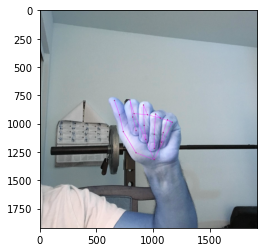

In [23]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
with mp_hands.Hands(min_detection_confidence=0.5,static_image_mode=True) as hands:
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image = cv2.flip(image, 1)
    image.flags.writeable = False
    results = hands.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_hand_landmarks:
        for num, hand in enumerate(results.multi_hand_landmarks):
#                 x_max = 0
#                 y_max = 0
#                 x_min = 200
#                 y_min = 200
#                 for lm in hand.landmark:
#                     x, y = int(lm.x * 200), int(lm.y * 200)
#                     if x > x_max:
#                         x_max = x
#                     if x < x_min:
#                         x_min = x
#                     if y > y_max:
#                         y_max = y
#                     if y < y_min:
#                         y_min = y
#                 cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
#                 img1 = image[x_min:x_max,y_min:y_max]
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                        mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                                        )
    plt.imshow(image)

In [33]:
def getXYlandmarksFromImages(directory):
    X, y = [], []
    i= 0
    mp_drawing = mp.solutions.drawing_utils
    mp_hands = mp.solutions.hands
    sign_leters_names = {}
    for img_dir in directory:
        letter = img_dir.split('\\')[-1]
        file_list = []
        for entry in os.scandir(img_dir):
            file_list.append(entry.path)
        sign_leters_names[letter] = file_list
    class_dict = {}
    count = 0
    for letters_names in sign_leters_names.keys():
        class_dict[letters_names] = count
        count = count + 1
    X, y = [], []
    for letter_name, training_files in sign_leters_names.items():
        for training_image in training_files:
            i = i + 1
            img = cv2.imread(training_image)
            scalled_raw_img = cv2.resize(img, (200,200))
            landmarksForImage = []
            with mp_hands.Hands(min_detection_confidence=0.6, static_image_mode=True, max_num_hands=1) as hands:
                image = cv2.cvtColor(scalled_raw_img, cv2.COLOR_BGR2RGB)
                image = cv2.flip(image, 1)
                image.flags.writeable = False
                results = hands.process(image)
                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                if results.multi_hand_landmarks:
                    for num, hand in enumerate(results.multi_hand_landmarks):
                        landmarksForImage = [[lm.x,lm.y,lm.z] for lm in hand.landmark]
                    print(class_dict[letter_name], i)
                    X.append(landmarksForImage)
                    y.append(class_dict[letter_name])
                    
    return X, y

In [34]:
X, y = getXYlandmarksFromImages(img_dirs)

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 57
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184
0 185
0 186
0 187
0 188
0 189
0 190
0 191
0 192
0 193
0 194
0 195
0 196
0 197
0 198
0 199
0 200
0 201
0 202
0 204
0 205
0 206


2 1455
2 1456
2 1457
2 1458
2 1459
2 1460
2 1463
2 1464
2 1465
2 1466
2 1467
3 1468
3 1469
3 1470
3 1471
3 1472
3 1473
3 1474
3 1475
3 1476
3 1477
3 1478
3 1479
3 1480
3 1481
3 1482
3 1483
3 1484
3 1485
3 1486
3 1487
3 1488
3 1490
3 1491
3 1492
3 1493
3 1494
3 1495
3 1496
3 1497
3 1501
3 1502
3 1503
3 1504
3 1505
3 1506
3 1507
3 1508
3 1509
3 1510
3 1511
3 1512
3 1513
3 1514
3 1515
3 1516
3 1517
3 1518
3 1519
3 1520
3 1521
3 1522
3 1523
3 1524
3 1525
3 1526
3 1527
3 1528
3 1529
3 1531
3 1534
3 1535
3 1536
3 1537
3 1538
3 1539
3 1540
3 1541
3 1542
3 1543
3 1545
3 1546
3 1547
3 1548
3 1549
3 1550
3 1551
3 1552
3 1553
3 1554
3 1555
3 1557
3 1564
3 1565
3 1566
3 1567
3 1568
3 1569
3 1570
3 1571
3 1572
3 1573
3 1574
3 1575
3 1576
3 1577
3 1578
3 1579
3 1580
3 1581
3 1582
3 1583
3 1584
3 1585
3 1586
3 1587
3 1588
3 1589
3 1590
3 1591
3 1592
3 1593
3 1594
3 1595
3 1596
3 1597
3 1598
3 1599
3 1600
3 1601
3 1602
3 1603
3 1604
3 1605
3 1606
3 1607
3 1608
3 1609
3 1610
3 1611
3 1612
3 1613
3 1614

5 2702
5 2703
5 2704
5 2705
5 2706
5 2707
5 2708
5 2709
5 2710
5 2711
5 2712
5 2713
5 2714
5 2715
5 2716
5 2717
5 2718
5 2719
5 2720
5 2721
5 2722
5 2723
5 2724
5 2725
5 2726
5 2727
5 2728
5 2729
5 2730
5 2731
5 2732
5 2733
5 2734
5 2735
5 2736
5 2737
5 2738
5 2739
5 2740
5 2741
5 2742
5 2743
5 2744
5 2745
5 2746
5 2747
5 2748
5 2749
5 2750
5 2751
5 2752
5 2753
5 2754
5 2755
5 2756
5 2757
5 2758
5 2759
5 2760
5 2761
5 2762
5 2763
5 2764
6 2765
6 2766
6 2767
6 2768
6 2769
6 2770
6 2771
6 2772
6 2773
6 2774
6 2775
6 2776
6 2777
6 2778
6 2779
6 2780
6 2781
6 2782
6 2783
6 2784
6 2785
6 2786
6 2787
6 2788
6 2789
6 2790
6 2791
6 2792
6 2793
6 2794
6 2795
6 2796
6 2797
6 2798
6 2799
6 2800
6 2801
6 2802
6 2803
6 2804
6 2805
6 2806
6 2807
6 2808
6 2809
6 2810
6 2811
6 2812
6 2813
6 2814
6 2815
6 2816
6 2817
6 2818
6 2819
6 2820
6 2821
6 2822
6 2823
6 2824
6 2825
6 2826
6 2827
6 2828
6 2829
6 2830
6 2831
6 2832
6 2833
6 2834
6 2835
6 2836
6 2837
6 2838
6 2839
6 2840
6 2841
6 2842
6 2843
6 2844

9 3919
9 3923
9 3924
9 3931
9 3932
9 3935
9 3937
9 3946
9 3947
9 3948
9 3953
9 3954
9 3955
9 3956
9 3957
9 3958
9 3960
9 3961
9 3962
9 3963
9 3966
9 3969
9 3971
9 3972
9 3976
9 3980
9 3981
9 3983
9 3986
9 3987
9 3988
9 3991
9 3995
9 3996
9 3998
9 4000
9 4001
9 4002
9 4003
9 4004
9 4005
9 4006
9 4011
9 4012
9 4013
9 4015
9 4016
9 4017
9 4018
9 4024
9 4035
9 4042
9 4044
9 4045
9 4046
9 4047
9 4048
9 4049
9 4050
9 4051
9 4054
9 4055
9 4057
9 4058
9 4059
9 4060
9 4063
9 4064
9 4069
9 4071
9 4072
9 4074
9 4075
9 4076
9 4077
9 4078
9 4079
9 4080
9 4086
9 4087
9 4088
9 4089
9 4091
9 4092
9 4093
9 4094
9 4097
9 4100
9 4102
9 4103
9 4105
9 4107
9 4108
9 4110
9 4112
9 4113
9 4114
9 4124
9 4130
9 4131
9 4132
9 4133
9 4135
9 4136
9 4138
9 4139
9 4140
9 4141
9 4142
9 4143
9 4144
9 4145
9 4146
9 4148
9 4150
9 4151
9 4156
9 4157
9 4163
9 4165
9 4167
9 4168
9 4169
9 4170
9 4171
9 4172
9 4173
9 4174
9 4175
9 4176
9 4177
9 4178
9 4179
9 4180
9 4181
9 4182
9 4183
9 4184
9 4186
9 4188
9 4190
9 4191
9 4192

KeyboardInterrupt: 

In [20]:
x_train = np.array(X)
y_train = np.array(y)

np.save("images.npy", x_train)
np.save("labels.npy", y_train)

In [35]:
x_train = np.load("./images.npy")
y_train = np.load("./labels.npy")

In [36]:
x_train.shape

(13120, 21, 3)

In [37]:
y_train.shape

(13120,)

In [38]:
CLASSES = ['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'space',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [39]:
import tensorflow as tf
from tensorflow import keras

In [75]:
ann = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(80, activation='relu'),
        keras.layers.Dropout(.2),
        keras.layers.Dense(60, activation='relu'),
        keras.layers.Dense(40, activation='relu'),
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dense(len(CLASSES), activation='sigmoid')    
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=1200)

Epoch 1/1200
410/410 [==============================] - 1s 2ms/step - loss: 2.7515 - accuracy: 0.2139
Epoch 2/1200
410/410 [==============================] - 1s 1ms/step - loss: 1.3850 - accuracy: 0.5655
Epoch 3/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.9410 - accuracy: 0.7049
Epoch 4/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.7608 - accuracy: 0.7678
Epoch 5/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.6825 - accuracy: 0.7825
Epoch 6/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.6284 - accuracy: 0.8002
Epoch 7/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.5943 - accuracy: 0.8100
Epoch 8/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.5609 - accuracy: 0.8186
Epoch 9/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.5286 - accuracy: 0.8309
Epoch 10/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.501

410/410 [==============================] - 1s 1ms/step - loss: 0.2223 - accuracy: 0.9300
Epoch 80/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.2123 - accuracy: 0.9303
Epoch 81/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.2040 - accuracy: 0.9341
Epoch 82/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.2102 - accuracy: 0.9320
Epoch 83/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.2073 - accuracy: 0.9332
Epoch 84/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.2048 - accuracy: 0.9352
Epoch 85/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.2178 - accuracy: 0.9303
Epoch 86/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.2069 - accuracy: 0.9329
Epoch 87/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.2031 - accuracy: 0.9338
Epoch 88/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.2043 - a

410/410 [==============================] - 0s 1ms/step - loss: 0.1518 - accuracy: 0.9502
Epoch 158/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.1545 - accuracy: 0.9480
Epoch 159/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.1574 - accuracy: 0.9479
Epoch 160/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.1459 - accuracy: 0.9526
Epoch 161/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.1520 - accuracy: 0.9507
Epoch 162/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.1550 - accuracy: 0.9482
Epoch 163/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.1572 - accuracy: 0.9486
Epoch 164/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.1524 - accuracy: 0.9499
Epoch 165/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.1618 - accuracy: 0.9463
Epoch 166/1200
410/410 [==============================] - 1s 1ms/step - loss: 0

410/410 [==============================] - 1s 1ms/step - loss: 0.1164 - accuracy: 0.9612
Epoch 235/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.1296 - accuracy: 0.9577
Epoch 236/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.1285 - accuracy: 0.9599
Epoch 237/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.1383 - accuracy: 0.9530
Epoch 238/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.1355 - accuracy: 0.9552
Epoch 239/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.1330 - accuracy: 0.9557
Epoch 240/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.1319 - accuracy: 0.9564
Epoch 241/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.1195 - accuracy: 0.9622
Epoch 242/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.1333 - accuracy: 0.9559
Epoch 243/1200
410/410 [==============================] - 0s 1ms/step - loss: 0

Epoch 312/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.1164 - accuracy: 0.9620
Epoch 313/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.1092 - accuracy: 0.9652
Epoch 314/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.1123 - accuracy: 0.9612
Epoch 315/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.1219 - accuracy: 0.9610
Epoch 316/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.1218 - accuracy: 0.9604
Epoch 317/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.1185 - accuracy: 0.9620
Epoch 318/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.1184 - accuracy: 0.9615
Epoch 319/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.1034 - accuracy: 0.9641
Epoch 320/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.1049 - accuracy: 0.9640
Epoch 321/1200
410/410 [==============================] - 1s 1ms

410/410 [==============================] - 0s 1ms/step - loss: 0.1036 - accuracy: 0.9639
Epoch 391/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.1013 - accuracy: 0.9655
Epoch 392/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.1005 - accuracy: 0.9649
Epoch 393/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.1009 - accuracy: 0.9662
Epoch 394/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.1003 - accuracy: 0.9674
Epoch 395/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.1048 - accuracy: 0.9649
Epoch 396/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0986 - accuracy: 0.9668
Epoch 397/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.1027 - accuracy: 0.9657
Epoch 398/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.1052 - accuracy: 0.9657
Epoch 399/1200
410/410 [==============================] - 0s 1ms/step - loss: 0

410/410 [==============================] - 0s 1ms/step - loss: 0.0914 - accuracy: 0.9688
Epoch 468/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0882 - accuracy: 0.9702
Epoch 469/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.0832 - accuracy: 0.9701
Epoch 470/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.0932 - accuracy: 0.9695
Epoch 471/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.0953 - accuracy: 0.9678
Epoch 472/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.1034 - accuracy: 0.9669
Epoch 473/1200
410/410 [==============================] - ETA: 0s - loss: 0.1006 - accuracy: 0.96 - 1s 2ms/step - loss: 0.0991 - accuracy: 0.9691
Epoch 474/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0959 - accuracy: 0.9658
Epoch 475/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0866 - accuracy: 0.9685
Epoch 476/1200
410/410 [=============

410/410 [==============================] - 1s 1ms/step - loss: 0.0863 - accuracy: 0.9705
Epoch 545/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0836 - accuracy: 0.9719
Epoch 546/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0862 - accuracy: 0.9713: 0s - loss: 0.0753 
Epoch 547/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0846 - accuracy: 0.9728
Epoch 548/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0872 - accuracy: 0.9699
Epoch 549/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.9696
Epoch 550/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0874 - accuracy: 0.9703
Epoch 551/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0892 - accuracy: 0.9702: 0s - loss: 0.1017 
Epoch 552/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.0875 - accuracy: 0.9711
Epoch 553/1200
410/410 [===============

410/410 [==============================] - 1s 1ms/step - loss: 0.0869 - accuracy: 0.9722
Epoch 622/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0837 - accuracy: 0.9719
Epoch 623/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0878 - accuracy: 0.9704
Epoch 624/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0867 - accuracy: 0.9706
Epoch 625/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0764 - accuracy: 0.9757
Epoch 626/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.0827 - accuracy: 0.9710
Epoch 627/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.0867 - accuracy: 0.9718
Epoch 628/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0963 - accuracy: 0.9695
Epoch 629/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0779 - accuracy: 0.9724
Epoch 630/1200
410/410 [==============================] - 1s 1ms/step - loss: 0

410/410 [==============================] - 0s 1ms/step - loss: 0.0803 - accuracy: 0.9723
Epoch 699/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0780 - accuracy: 0.9737
Epoch 700/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.9747
Epoch 701/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0764 - accuracy: 0.9748
Epoch 702/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0816 - accuracy: 0.9713
Epoch 703/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0797 - accuracy: 0.9728
Epoch 704/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0830 - accuracy: 0.9735
Epoch 705/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0807 - accuracy: 0.9742
Epoch 706/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0728 - accuracy: 0.9751
Epoch 707/1200
410/410 [==============================] - 0s 1ms/step - loss: 0

410/410 [==============================] - 0s 1ms/step - loss: 0.0687 - accuracy: 0.9759
Epoch 777/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0877 - accuracy: 0.9698
Epoch 778/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0725 - accuracy: 0.9775
Epoch 779/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0715 - accuracy: 0.9754
Epoch 780/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0725 - accuracy: 0.9749
Epoch 781/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0764 - accuracy: 0.9736
Epoch 782/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.9745
Epoch 783/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0723 - accuracy: 0.9752
Epoch 784/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0773 - accuracy: 0.9740
Epoch 785/1200
410/410 [==============================] - 0s 1ms/step - loss: 0

410/410 [==============================] - 1s 2ms/step - loss: 0.0722 - accuracy: 0.9764
Epoch 855/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0711 - accuracy: 0.9768
Epoch 856/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.0731 - accuracy: 0.9752
Epoch 857/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0633 - accuracy: 0.9780
Epoch 858/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.0863 - accuracy: 0.9716
Epoch 859/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.0688 - accuracy: 0.9777
Epoch 860/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.0874 - accuracy: 0.9723
Epoch 861/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.0706 - accuracy: 0.9767
Epoch 862/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.0674 - accuracy: 0.9780
Epoch 863/1200
410/410 [==============================] - 1s 1ms/step - loss: 0

410/410 [==============================] - 0s 1ms/step - loss: 0.0740 - accuracy: 0.9757
Epoch 933/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0688 - accuracy: 0.9767
Epoch 934/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0757 - accuracy: 0.9734
Epoch 935/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0784 - accuracy: 0.9740
Epoch 936/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0707 - accuracy: 0.9774
Epoch 937/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.9769
Epoch 938/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0753 - accuracy: 0.9747
Epoch 939/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0718 - accuracy: 0.9752
Epoch 940/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0651 - accuracy: 0.9766
Epoch 941/1200
410/410 [==============================] - 0s 1ms/step - loss: 0

410/410 [==============================] - 1s 1ms/step - loss: 0.0704 - accuracy: 0.9769
Epoch 1011/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0675 - accuracy: 0.9757
Epoch 1012/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0722 - accuracy: 0.9753
Epoch 1013/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.9740
Epoch 1014/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9736
Epoch 1015/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0670 - accuracy: 0.9764
Epoch 1016/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0688 - accuracy: 0.9771
Epoch 1017/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0702 - accuracy: 0.9754
Epoch 1018/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0657 - accuracy: 0.9776
Epoch 1019/1200
410/410 [==============================] - 0s 1ms/step 

410/410 [==============================] - 0s 1ms/step - loss: 0.0675 - accuracy: 0.9777
Epoch 1088/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0633 - accuracy: 0.9790
Epoch 1089/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0714 - accuracy: 0.9758
Epoch 1090/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0615 - accuracy: 0.9784
Epoch 1091/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0599 - accuracy: 0.9800
Epoch 1092/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0730 - accuracy: 0.9748
Epoch 1093/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0697 - accuracy: 0.9778
Epoch 1094/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0690 - accuracy: 0.9771
Epoch 1095/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0672 - accuracy: 0.9755: 0s - loss: 0.0675 - accuracy: 0.97
Epoch 1096/1200
410/410 [==========

410/410 [==============================] - 1s 1ms/step - loss: 0.0687 - accuracy: 0.9769
Epoch 1164/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0646 - accuracy: 0.9777
Epoch 1165/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0608 - accuracy: 0.9803: 0s - loss: 0.0567 - accu
Epoch 1166/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.0619 - accuracy: 0.9787
Epoch 1167/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.0699 - accuracy: 0.9762
Epoch 1168/1200
410/410 [==============================] - 1s 2ms/step - loss: 0.0768 - accuracy: 0.9735
Epoch 1169/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0638 - accuracy: 0.9785
Epoch 1170/1200
410/410 [==============================] - 1s 1ms/step - loss: 0.0650 - accuracy: 0.9781
Epoch 1171/1200
410/410 [==============================] - 0s 1ms/step - loss: 0.0695 - accuracy: 0.9771
Epoch 1172/1200
410/410 [====================

In [41]:
x1,y1 = getXYlandmarksFromImages(test_dirs) 

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 20
0 21
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
1 32
1 33
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
2 61
2 62
2 63
2 64
2 65
2 66
2 67
2 68
2 69
2 70
2 71
2 72
2 73
2 74
2 75
2 76
2 77
2 78
2 80
2 81
2 82
2 83
2 84
2 85
2 86
2 90
3 91
3 92
3 93
3 94
3 95
3 96
3 97
3 98
3 99
3 100
3 101
3 102
3 103
3 104
3 105
3 106
3 107
3 108
3 109
3 110
3 111
3 112
3 113
3 114
3 115
3 116
3 117
3 118
3 119
3 120
4 121
4 122
4 123
4 124
4 125
4 126
4 127
4 128
4 129
4 130
4 131
4 132
4 133
4 134
4 135
4 136
4 137
4 138
4 139
4 140
4 141
4 142
4 143
4 144
4 145
4 146
4 147
4 148
4 149
4 150
5 151
5 152
5 153
5 154
5 155
5 156
5 157
5 158
5 159
5 160
5 161
5 162
5 163
5 164
5 165
5 166
5 167
5 168
5 169
5 170
5 171
5 172
5 173
5 174
5 175
5 176
5 177
5 178
5 179
5 180
6 181
6 182
6 183
6 184
6 185
6 186
6 187
6 188
6 189
6 190
6 191
6 

In [42]:
x_test = np.array(x1)
y_test = np.array(y1)

In [76]:
ann.evaluate(x_test,y_test)

25/25 [==============================] - 0s 975us/step - loss: 0.0328 - accuracy: 0.9935


[0.03284038230776787, 0.9934980273246765]

In [77]:
accuracy = np.around(ann.evaluate(x_test,y_test)[1]*100,2)

25/25 [==============================] - 0s 896us/step - loss: 0.0328 - accuracy: 0.9935


In [78]:
accuracy

99.35

In [53]:
#faycal
MODEL_DIR = './aslalphabetcnnmodel1'
MODEL_PATH = MODEL_DIR + '/ann-model98.h5'
MODEL_WEIGHTS_PATH = MODEL_DIR + '/ann-model98.weights.h5'

In [79]:
#akram
MODEL_DIR = './akram/Models'
MODEL_WEIGHTS_DIR = './akram/Weights'
MODEL_PATH = MODEL_DIR + f'/ann-model-{accuracy}.h5'
MODEL_WEIGHTS_PATH = MODEL_WEIGHTS_DIR+ f'/ann-model-{accuracy}.weights.h5'

In [80]:
ann.save(MODEL_PATH)
ann.save_weights(MODEL_WEIGHTS_PATH)